<a href="https://colab.research.google.com/github/secretsather/Uno/blob/cleanup_main/Uno_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Played 1000000 games.
[250186, 249784, 249938, 250092]


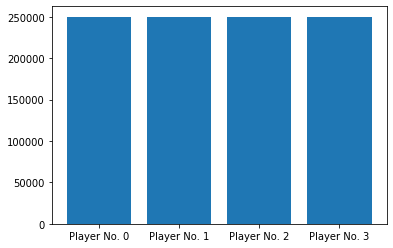

time: 9min 54s (started: 2021-03-27 11:07:26 -05:00)


In [ ]:
### Implementation of Uno              ###
### By George Gardner                  ###
### Last updated March 28, 2021        ###

import random
from random import randrange

#!pip install ipython-autotime
#%load_ext autotime

class card:
  def __init__(self, color, name):
    self.name = name
    self.color = color
  def __str__(self):
      return '{} {}'.format(self.color, self.name)
  def show(self):
    print ("{} {}".format(self.color, self.name))

class deck:
  def __init__(self):
    self.draw_pile = []
    self.discard_pile = []
    for c in ["Blue", "Green", "Red", "Yellow"]:
      for n in ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine", "Skip", "Reverse", "Draw Two"]:
        if n != "Zero":
          self.draw_pile.append(card(c,n))                                #This adds doubles of every card except Zero
        self.draw_pile.append(card(c,n))
      for i in range(8):
        if(i<4): self.draw_pile.append(card("","Wild")) 
        else: self.draw_pile.append(card("Draw 4","Wild")) 
    self.shuffle()

  def shuffle(self):
    random.shuffle(self.draw_pile)

  def draw(self, cp):
    if(len(self.draw_pile) < 1):
      for i in range(len(self.discard_pile)):
        self.draw_pile.append(self.discard_pile.pop())
      self.discard_pile.append(self.draw_pile.pop(0))
      self.shuffle()
      if (len(self.draw_pile) == 0): ##debugginng strange error where draw pile goes empty
        print(self.discard_pile[0])
        print(test.forceColor)
        print("discard pile: " + str(len(self.discard_pile)))
        for p in test.players:
          print(p)
          for c in p.hand:
            print(str(c.color) + ":" + c.name)
        print("currentplayer is " + str(cp))


      


      return self.draw_pile.pop()
    else:
      return self.draw_pile.pop()
  
class player:
  def __init__(self, player_number):
    self.hand = []
    self.number = player_number
    self.wins = 0
  def __str__(self):
    return "Player No. {}".format(str(self.number))
  def choosecolor(self):
    coList = ["Blue", "Green", "Red", "Yellow"]
    return coList[randrange(4)]

  def validPlays(self, inPlay, forcedColor):
    #valid plays should return a list of ints that list the valid card indexes of the players hand
    #idea is to then select a random card for data collection. 
    vp = []
    for index, c in enumerate(self.hand):
      if inPlay.name == "Wild":
        if c.color == forcedColor:
          vp.append(index)
      elif (c.color == inPlay.color) or (c.name == inPlay.name):
        vp.append(index)
      if (c.name == "Wild"):
        vp.append(index)
    return vp
  def play(self, valids): #card in play, forced color (used in the case a wild is placed)
    returning = randrange(len(valids))
    #print("returning: " + str(self.hand[valids[returning]]))
    return returning   

class game:
  def __init__(self, no_of_players, verbose):
    #startTime = time.process_time()
    self.verbose = verbose
    self.forceColor = "Blue" #need to set a color here in the event a wild is thrown as first card
    
    #validate number of players
    if(no_of_players > 10): raise NameError('Too many players')
    if(no_of_players < 2): raise NameError('Too few players')

    if self.verbose: print("The deck is being shuffled")
    self.Deck = deck()                                          #init deck
    if self.verbose: print("There are " + str(len(self.Deck.draw_pile)) + " cards in the draw pile.")
    
    self.players = []                                           #init players
    for p in range(no_of_players):
      self.players.append(player(p))
    if self.verbose: print("There are " + str(len(self.players)) + " players in this game.")
    currentplayer = randrange(len(self.players))               #todo: randomize starting player

    for i in range(7):                                          #deal starting hand to players
      for p in range(no_of_players):
        self.players[p].hand.append(self.Deck.draw(currentplayer))
    if self.verbose: print("The players have been dealt " + str(len(self.players[0].hand)) + " cards each.")

    self.Deck.discard_pile.append(self.Deck.draw_pile.pop())
    if self.verbose: print(str(self.Deck.discard_pile[0]) + " has been removed from the draw pile and place on the discard pile.")
    if self.verbose: print("There are " + str(len(self.Deck.draw_pile)) + " cards remaining in the draw pile.")

    if self.verbose: print("The game begins.*****************************************************")

    #for p in range(len(self.players)):
      #print(str(self.players[p]) + " has the following hand:")
      #for h in range(len(self.players[p].hand)):
        #print(self.players[p].hand[h])  

    self.winner = False
    direction = True                #tracks the direction of gameplay
    
    self.iteration = 0              #for now, this increments after each turn
    while self.winner != True:      #gamplay loops until winner = True
      
      #current player takes turn
      turn = 0
      while turn == 0:
        vp = self.players[currentplayer].validPlays(self.Deck.discard_pile[-1], self.forceColor)
        #print(vp)
        if len(vp) == 0:
          #print("d1")
          self.players[currentplayer].hand.append(self.Deck.draw(currentplayer))                             #draw a card                                #################
          if self.verbose: print("player " + str(currentplayer) + " draws a " + str(self.players[currentplayer].hand[-1]))
        else:
          cardToPlay = self.players[currentplayer].play(vp)
          #print("playing a" + str(self.players[currentplayer].hand[vp[cardToPlay]]))
          self.Deck.discard_pile.append(self.players[currentplayer].hand.pop(vp[cardToPlay]))
          turn = 1

      if self.verbose: print("Player " + str(currentplayer) + " has played a " + str(self.Deck.discard_pile[-1]))
      
      if self.Deck.discard_pile[-1].name == "Wild":
        self.forceColor = self.players[currentplayer].choosecolor() #need to choose color! 
        if self.verbose: print("Player " + str(currentplayer) + " chosen the color " + self.forceColor)

      #check win condition -- must not be getting to this poinnt??? **debug 1**
      if len(self.players[currentplayer].hand) == 0:
        #endTime = time.time()
        #totalTime = time.time() - startTime
        #print("{:.15f}".format(totalTime))
        #print(totalTime)
        #print("A total of " + str(self.iteration + 1) + " turns were taken in " + str(totalTime) + " seconds!")
        if self.verbose: print("Player " + str(currentplayer) + " wins!")
        self.players[currentplayer].wins += 1
        self.winner = True
        break            

      if self.Deck.discard_pile[-1].color == "Draw 4":
        playerToDraw = self.nextPlayer(currentplayer, direction)
        #print("d4")
        for i in range(4):
          self.players[playerToDraw].hand.append(self.Deck.draw(currentplayer))
        currentplayer = self.nextPlayer(currentplayer, direction) #only 1 needed here since player is advanced again
        if self.verbose: print("Player " + str(playerToDraw) + " has drawn 4 cards and lost its turn.")

      #check for draw 2
      if self.Deck.discard_pile[-1].name == "Draw Two":
        #print("d2")
        playerToDraw = self.nextPlayer(currentplayer, direction)
        self.players[playerToDraw].hand.append(self.Deck.draw(currentplayer))
        self.players[playerToDraw].hand.append(self.Deck.draw(currentplayer))
        if self.verbose: print("Player " + str(playerToDraw) + " has drawn 2 cards.")
      #player drawing does not lose turn here according to rules

      #check for played skip
      if self.Deck.discard_pile[-1].name == "Skip":
        currentplayer = self.nextPlayer(currentplayer, direction)
        currentplayer = self.nextPlayer(currentplayer, direction)
      else:
        #check for played reverse
        if self.Deck.discard_pile[-1].name == "Reverse":
          if direction: 
            direction = False 
          else:
            direction = True
        #then advance to next player        
        currentplayer = self.nextPlayer(currentplayer, direction)      
      
      self.iteration += 1 #so it doesn't run forever, since wild cards are not played yet,
      #if self.iteration == 79: self.winner = True #force a win condition

    ##### Sanity Check #####

    if self.verbose: 
      print("****************************************************************************")
      print("The discard pile consists of:")
      for count, c in enumerate(self.Deck.discard_pile): 
        print(str(count) + ": " + str(c.show()))

    #show all player hands
    #if self.verbose: 
      #for p in range(len(self.players)): 
        #print(str(self.players[p]) + " has the following hand:")
        #for h in range(len(self.players[p].hand)):
          #print(self.players[p].hand[h])  

    if self.verbose: print("There are " + str(len(self.Deck.draw_pile)) + " cards remaining in the draw pile.") 
    if self.verbose: print("There are " + str(len(self.Deck.discard_pile)) + " cards remaining in the discard pile.") 
    for count, p in enumerate(self.players):
      if self.verbose: print("Player " + str(count) + " has " + str(len(self.players[count].hand)) + " cards in hand")

    ##### End Sanity Check #####

  def nextPlayer(self, cp, dir):
    if dir: 
        cp +=1 
        if cp > (len(self.players) - 1): cp = 0
    else:
      if cp == 0:
        cp = (len(self.players) - 1)
      else:
        cp -= 1
    return cp

##gamesStart = time.time()
giter = 1000000
playerWins = [0,0,0,0]
for gameIterate in range(giter):
  test = game(4, verbose=False) #test game with 4 players, verbose = False
  for p in test.players:
    if p.wins == 1:
      playerWins[p.number] += 1



print("Played " + str(giter) + " games.")

print(playerWins)

import numpy as np
import matplotlib.pyplot as plt
 

bars = []
for p in test.players:
  bars.append(str(p))

x_pos = np.arange(len(bars))
 
# Create bars
plt.bar(x_pos, playerWins)
 
# Create names on the x-axis
plt.xticks(x_pos, bars)
 
# Show graphic
plt.show()






